2026/02/21 11:29:00 INFO mlflow.tracking.fluent: Experiment with name 'Mood_Classification_Modelling' does not exist. Creating a new experiment.


✅ Setup Modelling selesai
✅ MLflow tracking URI: file:./mlruns
✅ MLflow experiment: Mood_Classification_Modelling
✅ MLflow version: 3.10.0

📊 Informasi Dataset:
   Total samples: 200
   Kolom: ['id', 'lyrics', 'mood', 'title', 'artist', 'lyrics_clean', 'char_count', 'word_count']
   Missing values: 0
✅ Feature engineering selesai

📊 Shape feature matrix: (200, 1000)
   Jumlah fitur: 1000
   Jumlah sample: 200
   Jumlah kelas: 4
   Kelas: ['angry' 'happy' 'relaxed' 'sad']
✅ Setup selesai
   5-Fold Cross Validation
   3 Model: RandomForest, SVM Linear, MLPClassifier
🚀 MEMULAI TRAINING 3 MODEL DENGAN 5-FOLD CV

Training RandomForest
✅ MLflow tracking aktif - Run ID: adb0b4f9f4744473b00ddb688e038228
Fold 1: Accuracy=0.5000, F1=0.5135
Fold 2: Accuracy=0.3500, F1=0.3495
Fold 3: Accuracy=0.5750, F1=0.5674


2026/02/21 11:29:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Fold 4: Accuracy=0.3250, F1=0.3512
Fold 5: Accuracy=0.5000, F1=0.4967

📊 Hasil Final RandomForest:
   Average Accuracy: 0.4500 (+/- 0.0962)
   Average F1 Score: 0.4557


2026/02/21 11:29:01 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html


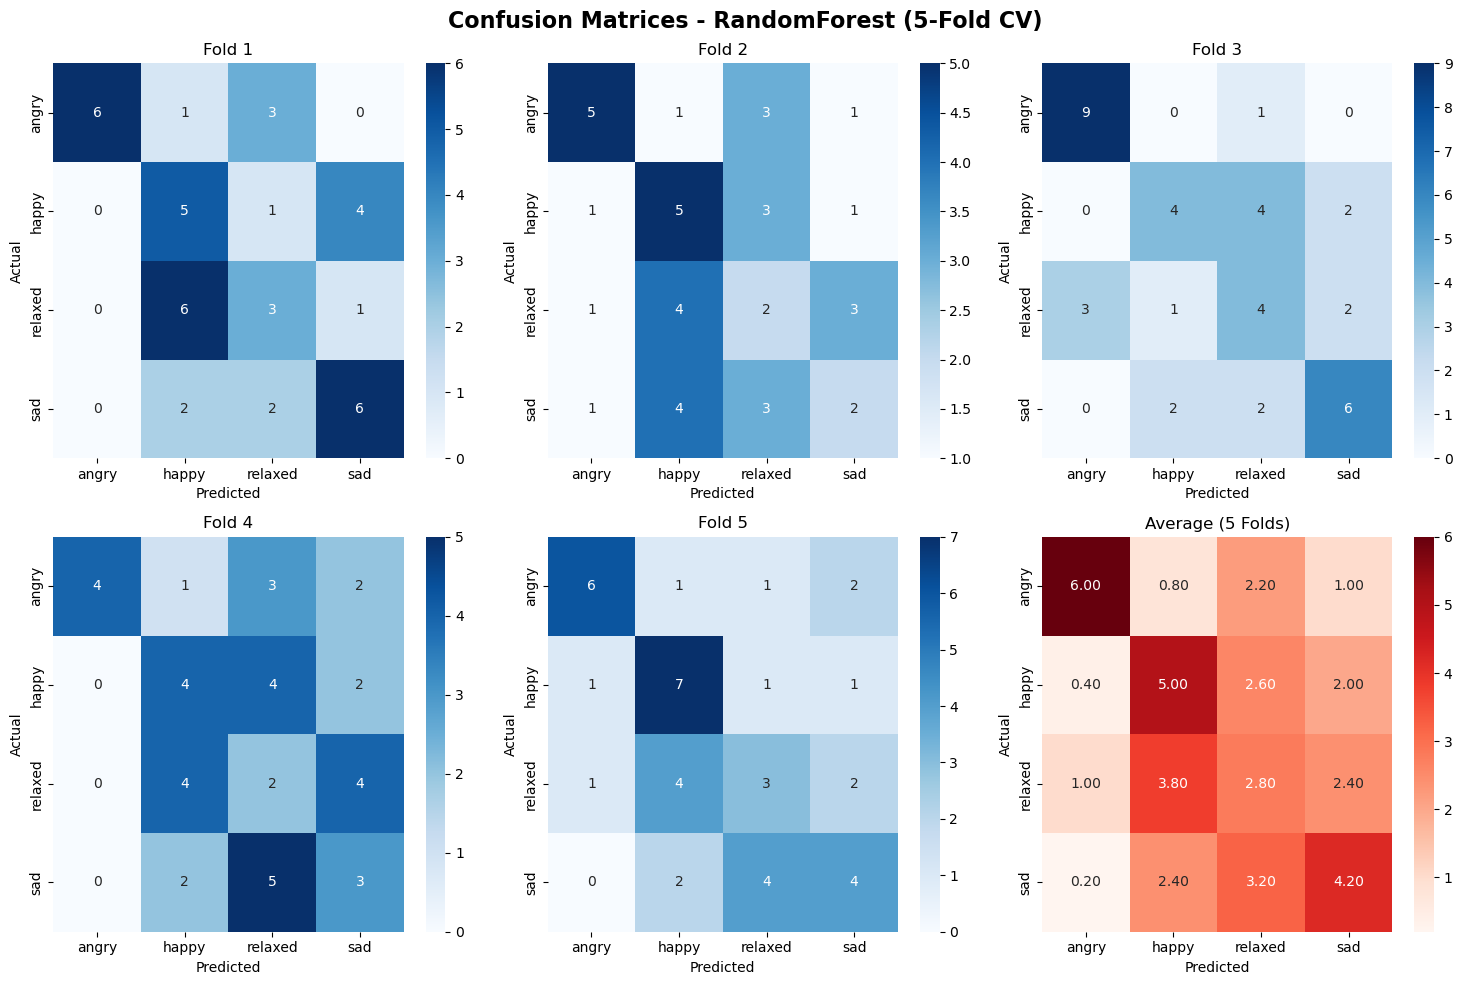

   ✅ Hasil disimpan di MLflow dan results_RandomForest.json

Training SVM_Linear
✅ MLflow tracking aktif - Run ID: 2581c7f5731e40899a25e5c7f04652f1
Fold 1: Accuracy=0.5750, F1=0.5652
Fold 2: Accuracy=0.4000, F1=0.3903
Fold 3: Accuracy=0.4250, F1=0.3678


2026/02/21 11:29:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/21 11:29:08 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html


Fold 4: Accuracy=0.3250, F1=0.3290
Fold 5: Accuracy=0.5500, F1=0.5238

📊 Hasil Final SVM_Linear:
   Average Accuracy: 0.4550 (+/- 0.0941)
   Average F1 Score: 0.4352


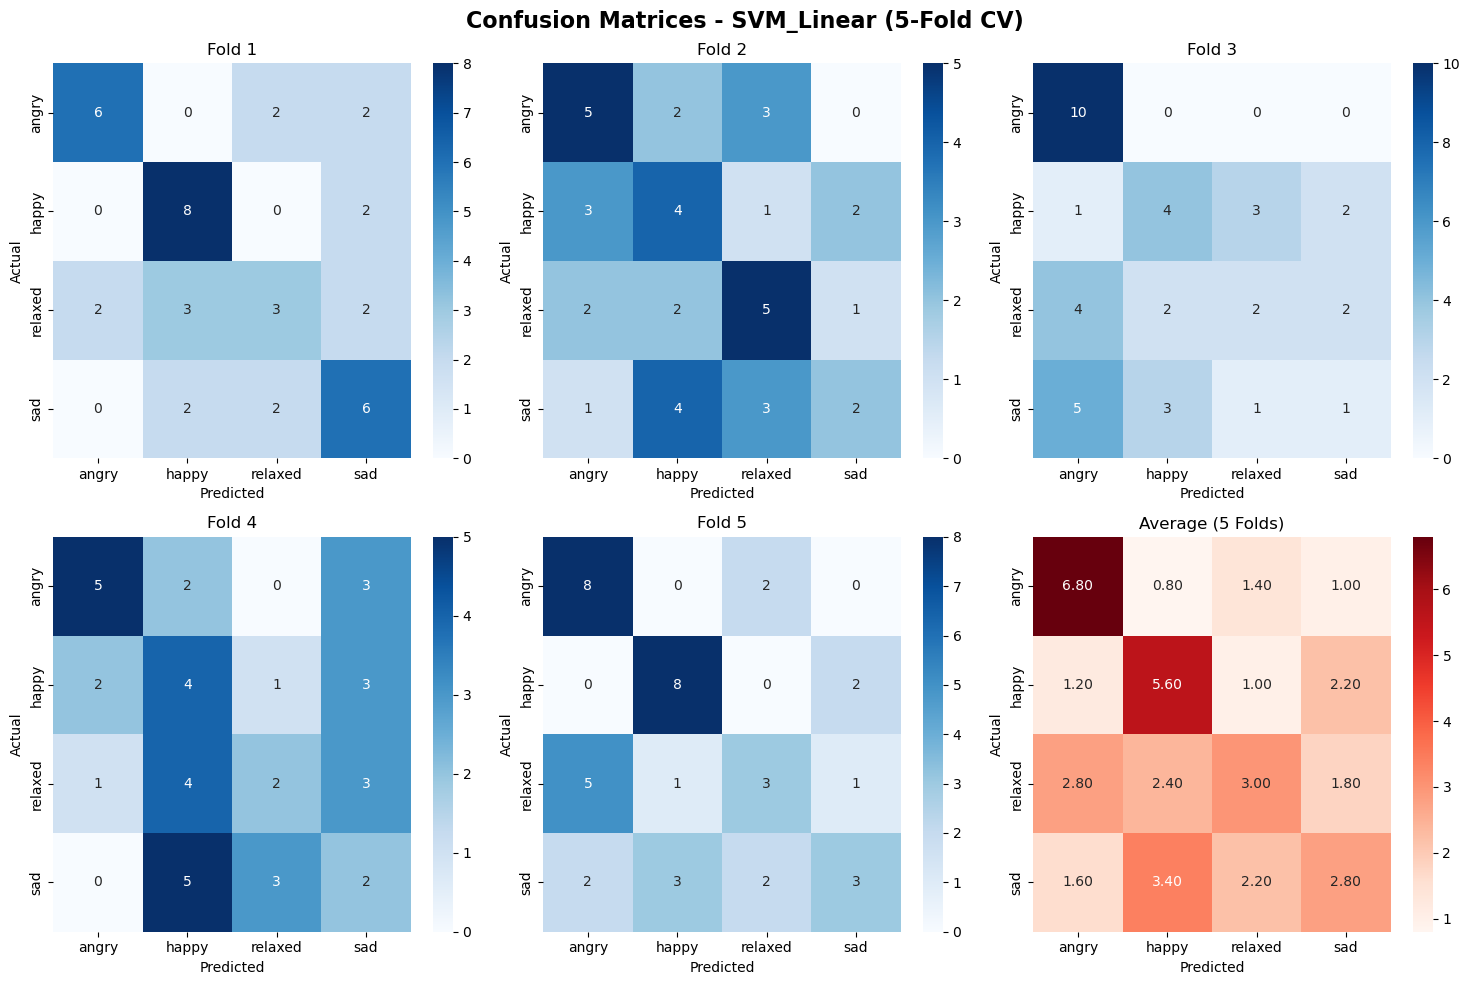

   ✅ Hasil disimpan di MLflow dan results_SVM_Linear.json

Training MLP
✅ MLflow tracking aktif - Run ID: 1ae0582086494e958d2ece6073b9689a
Fold 1: Accuracy=0.1500, F1=0.1099
Fold 2: Accuracy=0.4000, F1=0.3980
Fold 3: Accuracy=0.1250, F1=0.1255
Fold 4: Accuracy=0.1500, F1=0.1371
Fold 5: Accuracy=0.4750, F1=0.4334

📊 Hasil Final MLP:
   Average Accuracy: 0.2600 (+/- 0.1471)
   Average F1 Score: 0.2408


2026/02/21 11:29:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/21 11:29:13 WARNING mlflow.sklearn: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization. The recommended safe alternative is the 'skops' format. For more information, see: https://scikit-learn.org/stable/model_persistence.html


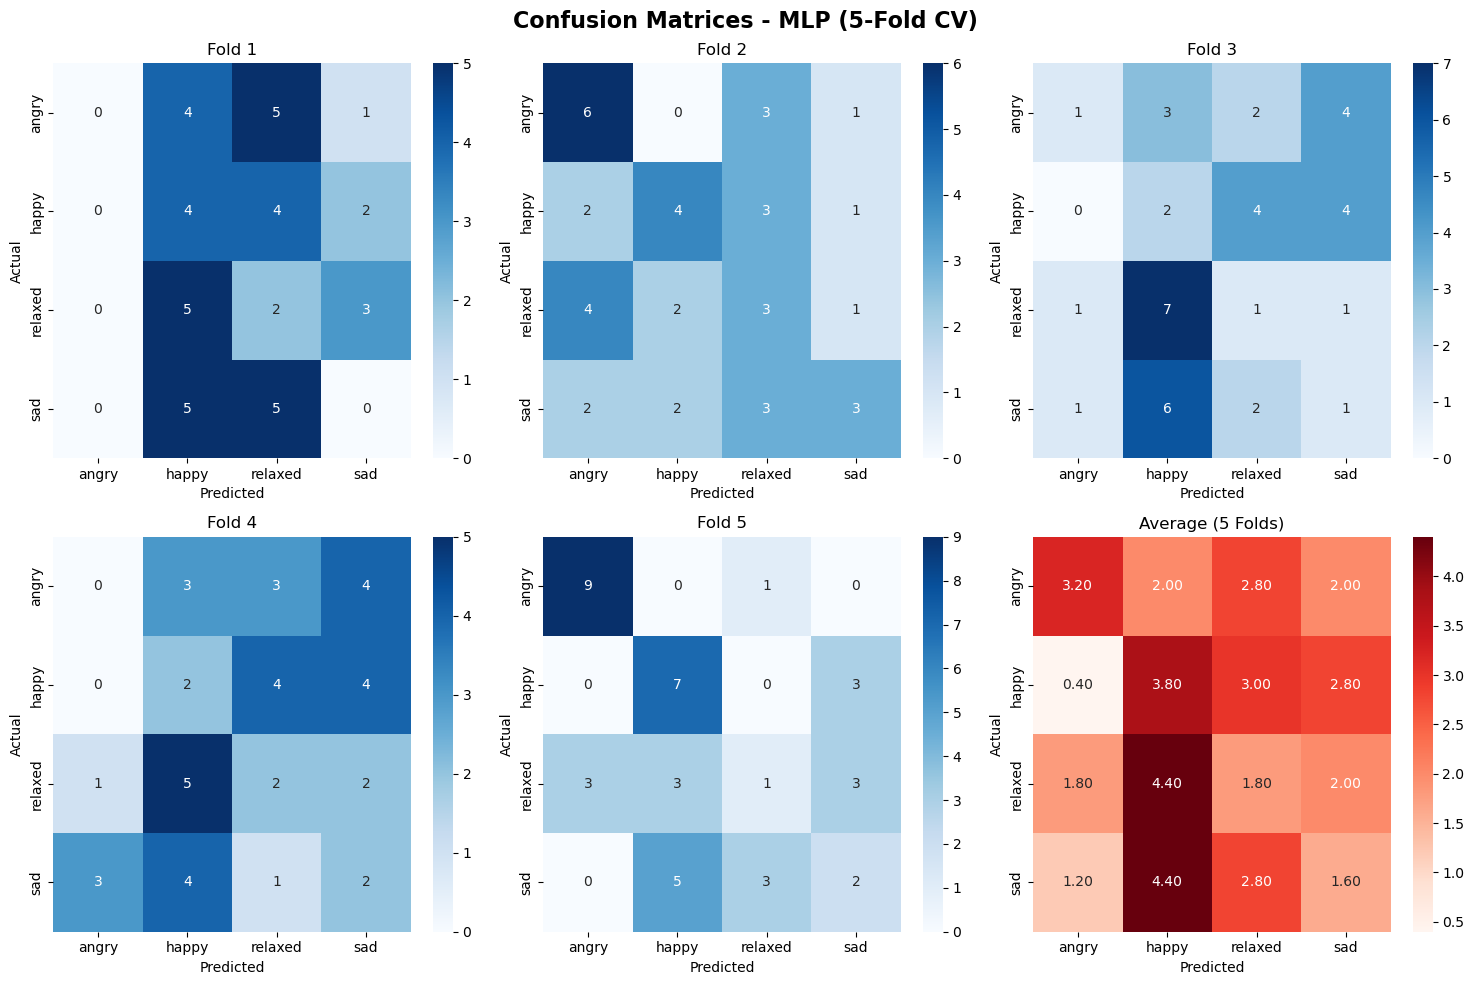

   ✅ Hasil disimpan di MLflow dan results_MLP.json

✅ SEMUA MODEL SELESAI DILATIH

PERBANDINGAN PERFORMANCE MODEL
       Model  Accuracy  F1 Score      Std
RandomForest     0.450  0.455660 0.096177
  SVM_Linear     0.455  0.435203 0.094074
         MLP     0.260  0.240796 0.147139


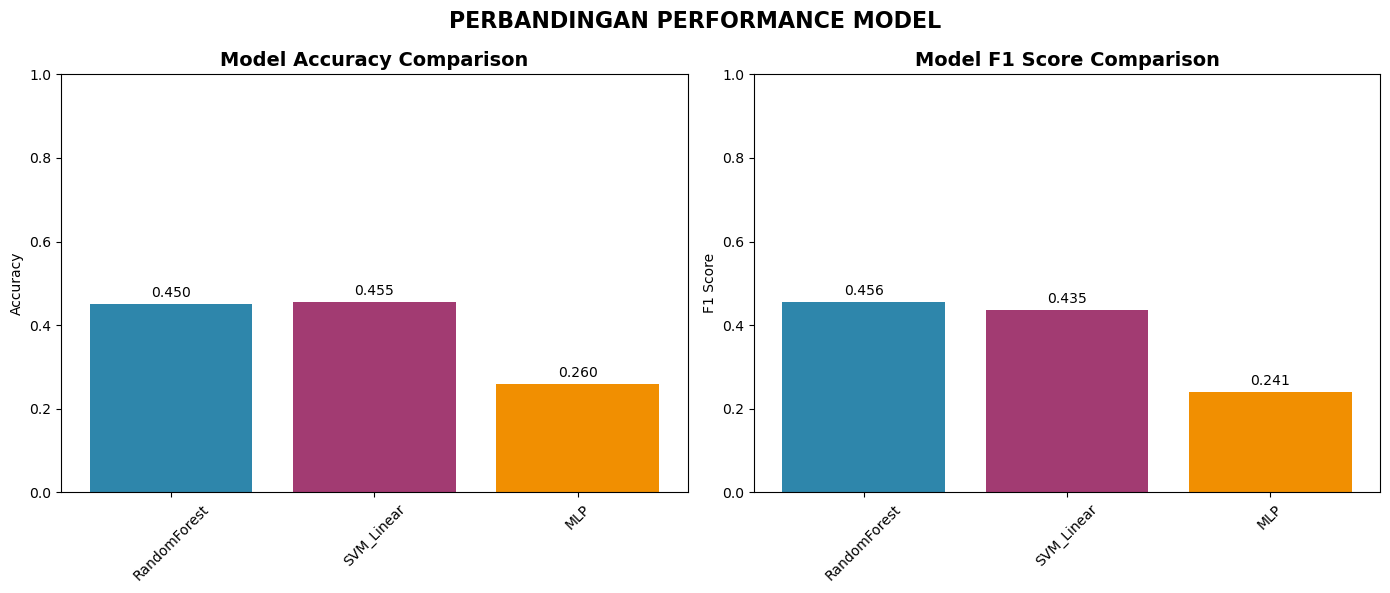


ERROR ANALYSIS - MODEL TERBAIK: RandomForest


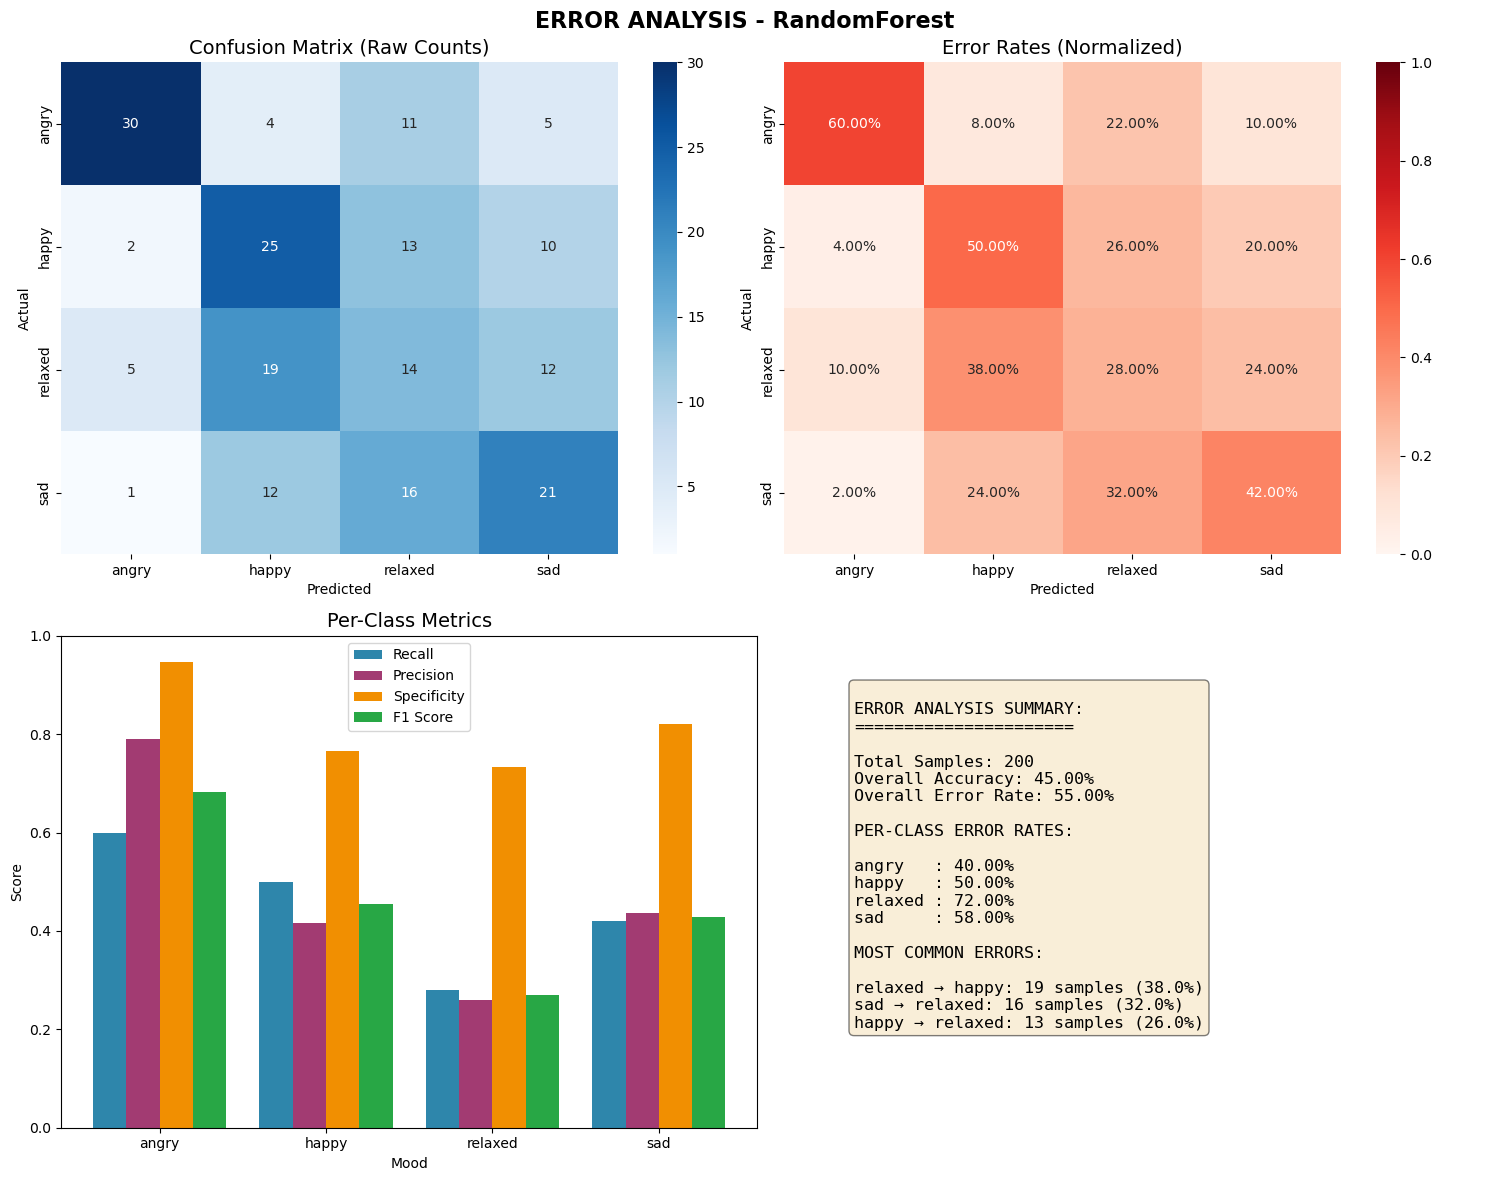


KESIMPULAN DAN HASIL AKHIR

📊 RINGKASAN HASIL:
Dataset: 200 samples
Fitur: 1000 fitur TF-IDF
Target: 4 mood (happy, sad, angry, relaxed)

🏆 MODEL TERBAIK: RandomForest
   Accuracy: 45.00%
   F1 Score: 45.57%
   Std Dev: 0.0962

📈 PERFORMANCE SEMUA MODEL:

   RandomForest: Accuracy=45.00%, F1=45.57%
   SVM_Linear  : Accuracy=45.50%, F1=43.52%
   MLP         : Accuracy=26.00%, F1=24.08%

🔍 ERROR ANALYSIS HIGHLIGHTS:
   Overall Error Rate: 55.00%

   angry   : Accuracy=60.00%, Error=40.00%
   happy   : Accuracy=50.00%, Error=50.00%
   relaxed : Accuracy=28.00%, Error=72.00%
   sad     : Accuracy=42.00%, Error=58.00%

📁 FILE YANG TERSIMPAN:
   1. best_model_*.pkl - Model terbaik
   2. best_scaler_*.pkl - Scaler untuk model terbaik
   3. tfidf_vectorizer.pkl - TF-IDF vectorizer
   4. label_encoder.pkl - Label encoder
   5. confusion_matrix_*.png - Confusion matrix setiap model
   6. model_comparison.png - Perbandingan model
   7. error_analysis_detailed.png - Analisis error
   8. results_*

In [1]:
# CELL 1: Setup dan Import Library untuk Modelling
"""
# 🤖 MODELLING - KLASIFIKASI MOOD LAGU
## File 2: Machine Learning Modelling
## Target: happy, sad, angry, relaxed
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
import re
import string
import json
from collections import Counter
from datetime import datetime
import time
warnings.filterwarnings('ignore')

# MLflow untuk tracking
import mlflow
import mlflow.sklearn

# Preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report)

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

# Setup MLflow
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("Mood_Classification_Modelling")

# Setup
np.random.seed(42)
plt.style.use('default')
sns.set_palette("husl")

print("✅ Setup Modelling selesai")
print(f"✅ MLflow tracking URI: {mlflow.get_tracking_uri()}")
print(f"✅ MLflow experiment: Mood_Classification_Modelling")
print(f"✅ MLflow version: {mlflow.__version__}")

# CELL 2: Load Processed Data
"""
## 📥 LOAD DATA HASIL EDA
"""

# Load data dari hasil EDA
df = pd.read_csv('../exploratory_data_analysis/processed_lyrics.csv')

print(f"\n📊 Informasi Dataset:")
print(f"   Total samples: {len(df)}")
print(f"   Kolom: {df.columns.tolist()}")
print(f"   Missing values: {df.isnull().sum().sum()}")
df.head()

# CELL 3: Feature Engineering dengan TF-IDF
"""
## 🔧 FEATURE ENGINEERING
"""

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,           # Maksimal 1000 fitur
    min_df=2,                    # Minimal muncul di 2 dokumen
    max_df=0.8,                   # Maksimal muncul di 80% dokumen
    stop_words='english',         # Hapus stopwords
    ngram_range=(1, 2),           # Unigram dan bigram
    sublinear_tf=True             # Gunakan skala log untuk tf
)

# Transform teks ke fitur TF-IDF
X = tfidf_vectorizer.fit_transform(df['lyrics_clean'])

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['mood'])

print("✅ Feature engineering selesai")
print(f"\n📊 Shape feature matrix: {X.shape}")
print(f"   Jumlah fitur: {X.shape[1]}")
print(f"   Jumlah sample: {X.shape[0]}")
print(f"   Jumlah kelas: {len(np.unique(y))}")
print(f"   Kelas: {label_encoder.classes_}")

# Simpan vectorizer dan encoder
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

# CELL 4: Setup Cross Validation dan Model
"""
## ⚙️ SETUP CROSS VALIDATION DAN MODEL
"""

# Setup 5-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary untuk menyimpan hasil
results = {}

# Definisikan model dengan parameter yang dioptimasi
models = {
    'RandomForest': RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    
    'SVM_Linear': LinearSVC(
        C=1.0,
        random_state=42,
        max_iter=2000,
        dual=False,
        class_weight='balanced'
    ),
    
    'MLP': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        alpha=0.001,
        batch_size='auto',
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
}

print("✅ Setup selesai")
print(f"   5-Fold Cross Validation")
print(f"   3 Model: RandomForest, SVM Linear, MLPClassifier")

# CELL 5: Training Function dengan MLflow
"""
## 🎯 FUNGSI TRAINING DENGAN MLFLOW TRACKING
"""

def train_and_evaluate(model, model_name, X, y, cv):
    """Train model dengan cross validation dan MLflow tracking"""
    
    print(f"\n{'='*50}")
    print(f"Training {model_name}")
    print('='*50)
    
    # Untuk menyimpan hasil setiap fold
    fold_scores = []
    confusion_matrices = []
    all_y_true = []
    all_y_pred = []
    
    # SIMPAN MANUAL KE FILE (sebagai backup)
    results_file = f'results_{model_name}.json'
    all_results = {
        'model': model_name,
        'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'folds': []
    }
    
    # MLflow tracking
    with mlflow.start_run(run_name=model_name) as run:
        print(f"✅ MLflow tracking aktif - Run ID: {run.info.run_id}")
        
        # Log parameters
        mlflow.log_params({
            'model_name': model_name,
            'cv_folds': 5,
            'feature_type': 'tfidf',
            'max_features': 1000,
            'ngram_range': '(1,2)'
        })
        
        # Log model-specific parameters
        if model_name == 'RandomForest':
            mlflow.log_params({
                'n_estimators': model.n_estimators,
                'max_depth': model.max_depth,
                'min_samples_split': model.min_samples_split,
                'min_samples_leaf': model.min_samples_leaf
            })
        elif model_name == 'SVM_Linear':
            mlflow.log_params({
                'C': model.C,
                'class_weight': model.class_weight,
                'max_iter': model.max_iter,
                'dual': model.dual
            })
        elif model_name == 'MLP':
            mlflow.log_params({
                'hidden_layer_sizes': str(model.hidden_layer_sizes),
                'activation': model.activation,
                'solver': model.solver,
                'alpha': model.alpha,
                'max_iter': model.max_iter,
                'early_stopping': model.early_stopping
            })
        
        # Cross validation loop
        for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            
            # Scale features (penting untuk SVM dan MLP)
            scaler = StandardScaler(with_mean=False)
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)
            
            # Train model
            model.fit(X_train_scaled, y_train)
            
            # Predict
            y_pred = model.predict(X_val_scaled)
            
            # Calculate metrics
            accuracy = accuracy_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)
            
            # Confusion matrix
            cm = confusion_matrix(y_val, y_pred)
            
            # Simpan hasil fold
            fold_result = {
                'fold': fold + 1,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'cm': cm.tolist()
            }
            
            fold_scores.append(fold_result)
            confusion_matrices.append(cm)
            all_y_true.extend(y_val)
            all_y_pred.extend(y_pred)
            
            print(f"Fold {fold+1}: Accuracy={accuracy:.4f}, F1={f1:.4f}")
            
            # Log ke MLflow per fold
            mlflow.log_metrics({
                f"fold_{fold+1}_accuracy": accuracy,
                f"fold_{fold+1}_f1": f1,
                f"fold_{fold+1}_precision": precision,
                f"fold_{fold+1}_recall": recall
            }, step=fold)
            
            # Simpan ke file
            all_results['folds'].append(fold_result)
        
        # Hitung rata-rata
        avg_accuracy = np.mean([s['accuracy'] for s in fold_scores])
        avg_precision = np.mean([s['precision'] for s in fold_scores])
        avg_recall = np.mean([s['recall'] for s in fold_scores])
        avg_f1 = np.mean([s['f1'] for s in fold_scores])
        std_accuracy = np.std([s['accuracy'] for s in fold_scores])
        
        print(f"\n📊 Hasil Final {model_name}:")
        print(f"   Average Accuracy: {avg_accuracy:.4f} (+/- {std_accuracy:.4f})")
        print(f"   Average F1 Score: {avg_f1:.4f}")
        
        # Log final metrics
        mlflow.log_metrics({
            'avg_accuracy': avg_accuracy,
            'avg_precision': avg_precision,
            'avg_recall': avg_recall,
            'avg_f1': avg_f1,
            'std_accuracy': std_accuracy
        })
        
        # Simpan scaler
        scaler_path = f'scaler_{model_name}.pkl'
        joblib.dump(scaler, scaler_path)
        
        # Log model dan artifacts
        mlflow.sklearn.log_model(model, f"model_{model_name}")
        mlflow.log_artifact(scaler_path)
        
        # Buat dan simpan confusion matrix
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(f'Confusion Matrices - {model_name} (5-Fold CV)', fontsize=16, fontweight='bold')
        
        for i, (cm_fold, ax) in enumerate(zip(confusion_matrices, axes.flat[:5])):
            sns.heatmap(cm_fold, annot=True, fmt='d', ax=ax, cmap='Blues',
                       xticklabels=label_encoder.classes_,
                       yticklabels=label_encoder.classes_)
            ax.set_title(f'Fold {i+1}')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')
        
        avg_cm = np.mean(confusion_matrices, axis=0)
        sns.heatmap(avg_cm, annot=True, fmt='.2f', ax=axes.flat[5], cmap='Reds',
                   xticklabels=label_encoder.classes_,
                   yticklabels=label_encoder.classes_)
        axes.flat[5].set_title('Average (5 Folds)')
        axes.flat[5].set_xlabel('Predicted')
        axes.flat[5].set_ylabel('Actual')
        
        plt.tight_layout()
        cm_path = f'confusion_matrix_{model_name}.png'
        plt.savefig(cm_path, dpi=150, bbox_inches='tight')
        plt.show()
        
        # Log confusion matrix
        mlflow.log_artifact(cm_path)
        
        # Simpan semua hasil ke file JSON
        all_results['average'] = {
            'accuracy': avg_accuracy,
            'precision': avg_precision,
            'recall': avg_recall,
            'f1': avg_f1,
            'std_accuracy': std_accuracy
        }
        
        with open(results_file, 'w') as f:
            json.dump(all_results, f, indent=2)
        
        mlflow.log_artifact(results_file)
        
        print(f"   ✅ Hasil disimpan di MLflow dan {results_file}")
        
        # Hapus file sementara
        os.remove(scaler_path)
        os.remove(cm_path)
    
    return {
        'model': model,
        'scaler': scaler,
        'avg_accuracy': avg_accuracy,
        'avg_f1': avg_f1,
        'std_accuracy': std_accuracy,
        'fold_scores': fold_scores,
        'confusion_matrices': confusion_matrices,
        'all_y_true': all_y_true,
        'all_y_pred': all_y_pred
    }

# CELL 6: Training Semua Model
"""
## 🚀 TRAINING SEMUA MODEL
"""

print("🚀 MEMULAI TRAINING 3 MODEL DENGAN 5-FOLD CV")
print("="*60)

results = {}

for model_name, model in models.items():
    result = train_and_evaluate(model, model_name, X, y, cv)
    results[model_name] = result
    time.sleep(1)  # Delay antara runs

print("\n" + "="*60)
print("✅ SEMUA MODEL SELESAI DILATIH")
print("="*60)

# CELL 7: Perbandingan Model
"""
## 📊 PERBANDINGAN MODEL
"""

# Buat dataframe perbandingan
comparison = []
for model_name, result in results.items():
    comparison.append({
        'Model': model_name,
        'Accuracy': result['avg_accuracy'],
        'F1 Score': result['avg_f1'],
        'Std': result['std_accuracy']
    })

comparison_df = pd.DataFrame(comparison)
comparison_df = comparison_df.sort_values('F1 Score', ascending=False)

print("\n" + "="*60)
print("PERBANDINGAN PERFORMANCE MODEL")
print("="*60)
print(comparison_df.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy comparison
bars1 = axes[0].bar(comparison_df['Model'], comparison_df['Accuracy'], 
                    color=['#2E86AB', '#A23B72', '#F18F01'])
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0, 1])
axes[0].tick_params(axis='x', rotation=45)

for bar, val in zip(bars1, comparison_df['Accuracy']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontsize=10)

# F1 Score comparison
bars2 = axes[1].bar(comparison_df['Model'], comparison_df['F1 Score'],
                    color=['#2E86AB', '#A23B72', '#F18F01'])
axes[1].set_title('Model F1 Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim([0, 1])
axes[1].tick_params(axis='x', rotation=45)

for bar, val in zip(bars2, comparison_df['F1 Score']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontsize=10)

plt.suptitle('PERBANDINGAN PERFORMANCE MODEL', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Log ke MLflow
with mlflow.start_run(run_name="Model_Comparison"):
    mlflow.log_artifact('model_comparison.png')
    comparison_df.to_csv('model_comparison.csv', index=False)
    mlflow.log_artifact('model_comparison.csv')
    
    for _, row in comparison_df.iterrows():
        mlflow.log_metrics({
            f"{row['Model']}_accuracy": row['Accuracy'],
            f"{row['Model']}_f1": row['F1 Score']
        })

# CELL 8: Error Analysis Model Terbaik
"""
## 🔍 ERROR ANALYSIS - MODEL TERBAIK
"""

# Ambil model terbaik berdasarkan F1 Score
best_model_name = comparison_df.iloc[0]['Model']
best_result = results[best_model_name]

print("\n" + "="*60)
print(f"ERROR ANALYSIS - MODEL TERBAIK: {best_model_name}")
print("="*60)

# Confusion matrix keseluruhan
cm = confusion_matrix(best_result['all_y_true'], best_result['all_y_pred'])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualisasi error analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'ERROR ANALYSIS - {best_model_name}', fontsize=16, fontweight='bold')

# 1. Confusion Matrix Raw
sns.heatmap(cm, annot=True, fmt='d', ax=axes[0,0], cmap='Blues',
           xticklabels=label_encoder.classes_,
           yticklabels=label_encoder.classes_)
axes[0,0].set_title('Confusion Matrix (Raw Counts)', fontsize=14)
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 2. Confusion Matrix Normalized
sns.heatmap(cm_normalized, annot=True, fmt='.2%', ax=axes[0,1], cmap='Reds',
           xticklabels=label_encoder.classes_,
           yticklabels=label_encoder.classes_,
           vmin=0, vmax=1)
axes[0,1].set_title('Error Rates (Normalized)', fontsize=14)
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# 3. Per-Class Performance
class_metrics = []
for i, mood in enumerate(label_encoder.classes_):
    tp = cm[i, i]
    fn = cm[i, :].sum() - tp
    fp = cm[:, i].sum() - tp
    tn = cm.sum() - (tp + fn + fp)
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    
    class_metrics.append({
        'Mood': mood,
        'Recall': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1': f1,
        'Error Rate': 1 - sensitivity
    })

class_metrics_df = pd.DataFrame(class_metrics)

# Plot per-class metrics
x = np.arange(len(label_encoder.classes_))
width = 0.2

axes[1,0].bar(x - width*1.5, class_metrics_df['Recall'], width, label='Recall', color='#2E86AB')
axes[1,0].bar(x - width/2, class_metrics_df['Precision'], width, label='Precision', color='#A23B72')
axes[1,0].bar(x + width/2, class_metrics_df['Specificity'], width, label='Specificity', color='#F18F01')
axes[1,0].bar(x + width*1.5, class_metrics_df['F1'], width, label='F1 Score', color='#28A745')

axes[1,0].set_xlabel('Mood')
axes[1,0].set_ylabel('Score')
axes[1,0].set_title('Per-Class Metrics', fontsize=14)
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(label_encoder.classes_)
axes[1,0].legend()
axes[1,0].set_ylim([0, 1])

# 4. Error Analysis Summary
axes[1,1].axis('off')

error_summary = f"""
ERROR ANALYSIS SUMMARY:
======================

Total Samples: {len(best_result['all_y_true'])}
Overall Accuracy: {best_result['avg_accuracy']:.2%}
Overall Error Rate: {1-best_result['avg_accuracy']:.2%}

PER-CLASS ERROR RATES:
"""
for i, mood in enumerate(label_encoder.classes_):
    error_rate = 1 - (cm[i,i] / cm[i,:].sum())
    error_summary += f"\n{mood:8}: {error_rate:.2%}"

error_summary += f"""

MOST COMMON ERRORS:
"""

errors = []
for i, true_mood in enumerate(label_encoder.classes_):
    for j, pred_mood in enumerate(label_encoder.classes_):
        if i != j and cm[i,j] > 0:
            errors.append({
                'true': true_mood,
                'pred': pred_mood,
                'count': cm[i,j],
                'pct': cm[i,j] / cm[i,:].sum()
            })

errors = sorted(errors, key=lambda x: x['count'], reverse=True)[:3]
for err in errors:
    error_summary += f"\n{err['true']} → {err['pred']}: {err['count']} samples ({err['pct']:.1%})"

axes[1,1].text(0.1, 0.9, error_summary, fontsize=12, verticalalignment='top',
               fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('error_analysis_detailed.png', dpi=150, bbox_inches='tight')
plt.show()

# Log error analysis ke MLflow
with mlflow.start_run(run_name=f"Error_Analysis_{best_model_name}"):
    mlflow.log_artifact('error_analysis_detailed.png')
    class_metrics_df.to_csv('class_metrics.csv', index=False)
    mlflow.log_artifact('class_metrics.csv')
    
    for i, mood in enumerate(label_encoder.classes_):
        mlflow.log_metric(f"error_rate_{mood}", 1 - (cm[i,i] / cm[i,:].sum()))

# CELL 9: Save Final Model dan Kesimpulan
"""
## 💾 SAVE FINAL MODEL DAN KESIMPULAN
"""

# Simpan model terbaik
best_model = results[best_model_name]['model']
best_scaler = results[best_model_name]['scaler']

joblib.dump(best_model, f'best_model_{best_model_name}.pkl')
joblib.dump(best_scaler, f'best_scaler_{best_model_name}.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("\n" + "="*60)
print("KESIMPULAN DAN HASIL AKHIR")
print("="*60)

print(f"""
📊 RINGKASAN HASIL:
==================
Dataset: {len(df)} samples
Fitur: {X.shape[1]} fitur TF-IDF
Target: 4 mood (happy, sad, angry, relaxed)

🏆 MODEL TERBAIK: {best_model_name}
   Accuracy: {best_result['avg_accuracy']:.2%}
   F1 Score: {best_result['avg_f1']:.2%}
   Std Dev: {best_result['std_accuracy']:.4f}

📈 PERFORMANCE SEMUA MODEL:
""")

for _, row in comparison_df.iterrows():
    print(f"   {row['Model']:12}: Accuracy={row['Accuracy']:.2%}, F1={row['F1 Score']:.2%}")

print(f"""
🔍 ERROR ANALYSIS HIGHLIGHTS:
   Overall Error Rate: {1-best_result['avg_accuracy']:.2%}
""")

for i, mood in enumerate(label_encoder.classes_):
    error_rate = 1 - (cm[i,i] / cm[i,:].sum())
    accuracy = cm[i,i] / cm[i,:].sum()
    print(f"   {mood:8}: Accuracy={accuracy:.2%}, Error={error_rate:.2%}")

print("\n📁 FILE YANG TERSIMPAN:")
print("   1. best_model_*.pkl - Model terbaik")
print("   2. best_scaler_*.pkl - Scaler untuk model terbaik")
print("   3. tfidf_vectorizer.pkl - TF-IDF vectorizer")
print("   4. label_encoder.pkl - Label encoder")
print("   5. confusion_matrix_*.png - Confusion matrix setiap model")
print("   6. model_comparison.png - Perbandingan model")
print("   7. error_analysis_detailed.png - Analisis error")
print("   8. results_*.json - Hasil training per model")

print(f"\n✅ Semua hasil telah disimpan di MLflow")
print(f"   Untuk melihat hasil, jalankan: mlflow ui")
print("="*60)

# CELL 10: Test Prediksi dengan Model Terbaik
"""
## 🎯 TEST PREDIKSI
"""

def predict_mood(lyrics, model, vectorizer, scaler, label_encoder):
    """Fungsi untuk memprediksi mood dari lirik baru"""
    
    # Clean text
    if pd.isna(lyrics):
        return "unknown", None
    
    lyrics = str(lyrics).lower()
    lyrics = re.sub(r'\d+', '', lyrics)
    lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))
    lyrics = ' '.join(lyrics.split())
    
    # Transform ke TF-IDF
    X_new = vectorizer.transform([lyrics])
    
    # Scale
    X_new_scaled = scaler.transform(X_new)
    
    # Predict
    pred = model.predict(X_new_scaled)
    proba = None
    
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(X_new_scaled)
    
    mood_pred = label_encoder.inverse_transform(pred)[0]
    
    return mood_pred, proba

# Contoh test
test_lyrics = [
    "I'm so happy and joyful today, everything is perfect and wonderful",
    "Feeling so sad and lonely, crying alone in the dark",
    "I'm so angry and furious, I hate everything right now",
    "Peaceful calm relaxing day, zen meditation quiet"
]

print("\n" + "="*60)
print("TEST PREDIKSI DENGAN MODEL TERBAIK")
print("="*60)

for i, lyrics in enumerate(test_lyrics):
    mood, proba = predict_mood(lyrics, best_model, tfidf_vectorizer, 
                               best_scaler, label_encoder)
    print(f"\nTest {i+1}: {lyrics[:50]}...")
    print(f"Predicted Mood: {mood.upper()}")
    if proba is not None:
        probs = dict(zip(label_encoder.classes_, proba[0]))
        for mood_name, prob_value in sorted(probs.items(), key=lambda x: x[1], reverse=True):
            print(f"   {mood_name}: {prob_value:.2%}")